<h3>Evolution of how select Philippine media used data science terms</h3>

<div class="text-justify">Using Python webscraping packages (<i>BeautifulSoup</i> and <i>urllib</i>), news websites are crawled for news articles related to <b>data science</b>, <b>big data</b>, <b>artificial intelligence</b>, <b>analytics</b>, and <b>robotics</b>.</div>

In [3]:
from bs4 import BeautifulSoup
from htmldate import find_date
import urllib.request,sys,time
import requests
import pandas as pd
import re

In [4]:
#Terms considered
words = ["data science","analytics","big data","artificial intelligence","robotics"]

#Initialize database
news_data = pd.DataFrame(columns=["site","year","link","title","data_science_count","analytics_count","big_data_count","robotics_count","artificial_intelligence_count","article_length"])

<div class="text-justify">These functions will be used to scrape data from html files, extract data from news articles, write content of the news articles in a <i>.txt</i> file, and store data in the <b>news database</b>.</div>

In [5]:
#Extract data using request package
def getdata(url):
    try:
        page = requests.get(url,
                           headers={'User-Agent': 'Mozilla/5.0'})
        return page.text
    except Exception as e:
        error_type, error_obj, error_info = sys.exc_info()
        return "Error:"+ str(error_type)+" in link("+str(url)+") line:"+str(error_info.tb_lineo)

In [15]:
#Extract data from html
#For ABS-CBN only
def get_title(soup):
    title = ''.join(list(soup.find("title").get_text())[3:-2])
    return title

#Write news article in a .txt file from html
def write_txtfile(soup,title):
    file = open(title+".txt", "w")

    for data in soup.find_all("p"):
        sum = data.get_text()
        file.writelines(sum)
    
    file.writelines("\n"+url)
    file.close()

    
def parse_html(soup):
    page = []
    for data in soup.find_all("p"):
        batch = data.get_text().lower()
        line = re.findall( r'\w+|[^\s\w]+', batch)
        for word in line:
            page.append(word)
    return page

In [48]:
#Functions to count words "big data", "data science", and "artificial intelligence"
def count_big_data(content):
    counter_bd = 0
    length = len(content) - 1
    for i in range(length):
        if content[i] == "big" and content[i+1] == "data":
            counter_bd += 1
    return counter_bd
            
def count_data_science(content):     
    counter_ds = 0
    length = len(content) - 1
    for i in range(length):
        if content[i] == "data" and content[i+1] == "science":
            counter_ds += 1
    return counter_ds

def count_artificial_intelligence(content):
    counter_ai = 0
    length = len(content) - 1
    for i in range(length):
        if content[i] == "artificial" and content[i+1] == "intelligence":
            counter_ai += 1
    return counter_ai

In [8]:
#Addition of data from the database of news articles
def add_data(site,content,url,title,year):
    data = pd.DataFrame({"site": site, "year": year,"link":url,"title":title,
           "data_science_count":count_data_science(content),
           "analytics_count":content.count(words[1]),
           "big_data_count":count_big_data(content),
           "robotics_count":content.count(words[4]),
           "artificial_intelligence_count":count_artificial_intelligence(content),"article_length":len(content)}, index=[0])
    return data

<h3>Extracting data from ABS-CBN website</h3>

In [73]:
site = "ABS-CBN"
url = "https://news.abs-cbn.com/news/08/04/22/up-opens-phs-first-phd-program-in-artificial-intelligence"
htmldata = getdata(url)
soup = BeautifulSoup(htmldata,"html.parser")
title = get_title(soup)
year = list(soup.find("span",{"class":"date-posted"}))
year = ''.join(list(str(year))[9:13])
write_txtfile(soup,title)
content = parse_html(soup)
news_data = pd.concat([add_data(site,content,url,title,year),news_data])
print("Total number of articles in the database: ",len(news_data.index))
news_data.head()

Total number of articles in the database:  32


,site,year,link,title,data_science_count,analytics_count,big_data_count,robotics_count,artificial_intelligence_count,article_length
0,ABS-CBN,2022,https://news.abs-cbn.com/news/08/04/22/up-open...,UP opens PH's first PhD program in artificial ...,0,0,0,0,2,578
0,ABS-CBN,2022,https://news.abs-cbn.com/business/05/18/22/the...,The 'bots' at heart of Twitter buyout row | AB...,0,0,0,0,1,945
0,ABS-CBN,2018,https://news.abs-cbn.com/business/11/22/18/rob...,Robot concierge coming to SM as Henry Sy turns...,0,0,0,0,1,881
0,ABS-CBN,2022,https://news.abs-cbn.com/spotlight/09/28/22/no...,No human could do that: Is AI becoming too ali...,0,0,0,0,1,1433
0,ABS-CBN,2021,https://news.abs-cbn.com/business/05/05/21/phi...,Philippines lays out AI industry road map | AB...,0,5,1,0,1,1193


<h3>Extracting data from Inquirer website</h3>

In [134]:
site = "Inquirer"
url = "https://opinion.inquirer.net/56983/what-are-big-data"

htmldata = getdata(url)
soup = BeautifulSoup(htmldata,"html.parser")
title = soup.find("title").get_text()
year = list(soup.find("div",id="art_plat"))[2] #year published: year[0] for PhilStar
year = ''.join(list(str(year))[-4:])
write_txtfile(soup,title)
content = parse_html(soup)
news_data = pd.concat([add_data(site,content,url,title,year),news_data])
print("Total number of articles in the database: ",len(news_data.index))
news_data.head()

Total number of articles in the database:  73


,site,year,link,title,data_science_count,analytics_count,big_data_count,robotics_count,artificial_intelligence_count,article_length
0,Inquirer,2013,https://opinion.inquirer.net/56983/what-are-bi...,What are big data? | Inquirer Opinion,0,1,6,0,0,784
0,Inquirer,2022,https://newsinfo.inquirer.net/1540809/another-...,"Another all-time high: PH records 39,004 new C...",0,0,0,0,0,568
0,Inquirer,2019,https://opinion.inquirer.net/119581/the-future...,The future of work | Inquirer Opinion,0,0,1,0,1,909
0,Inquirer,2021,https://business.inquirer.net/331674/intellige...,Intelligent finance key to unlocking agile inn...,0,1,1,0,1,1387
0,Inquirer,2022,https://newsinfo.inquirer.net/1659610/salceda-...,Salceda suspects contact tracing as source of ...,0,0,1,0,0,1007


<h3>Extracting data from PhilStar website</h3>

In [208]:
site = "PhilStar"
url = "https://www.philstar.com/business/banking/2019/10/15/1960131/lends-hand-use-big-data-central-banking"

htmldata = getdata(url)
soup = BeautifulSoup(htmldata,"html.parser")
title = soup.find("title").get_text()
#link = soup.find("meta",property="og:url")["content"]
year = list(soup.find("div",{"class":"article__date-published"}))[0] #year published: year[0] for PhilStar
year = ''.join(list(str(year))[9:13])
year = "2019"
write_txtfile(soup,title)
content = parse_html(soup)
news_data = pd.concat([add_data(site,content,url,title,year),news_data])
print("Total number of articles in the database: ",len(news_data.index))
news_data.head()

Total number of articles in the database:  106


,site,year,link,title,data_science_count,analytics_count,big_data_count,robotics_count,artificial_intelligence_count,article_length
0,PhilStar,2019,https://www.philstar.com/business/banking/2019...,UP lends hand on use of big data in central ba...,0,0,9,0,0,253
0,PhilStar,2017,https://www.philstar.com/business/2017/01/30/1...,Our future in digital | Philstar.com,0,2,1,0,0,1531
0,PhilStar,2018,https://www.philstar.com/business/2018/11/16/1...,Are we ready for the digital future? | Philst...,0,0,1,0,1,444
0,PhilStar,2022,https://www.philstar.com/business/2022/05/04/2...,Alternative facts | Philstar.com,1,1,2,0,0,1238
0,PhilStar,2019,https://www.philstar.com/business/2019/12/23/1...,Big data vs corruption? | Philstar.com,0,4,2,0,0,1160


<h4>Delete an entry from the news database</h4>

In [200]:
news_data = news_data.iloc[1:,:]
print("Total number of articles in the database: ",len(news_data.index))
news_data.head()

Total number of articles in the database:  98


,site,year,link,title,data_science_count,analytics_count,big_data_count,robotics_count,artificial_intelligence_count,article_length
0,PhilStar,2021,https://www.philstar.com/business/2021/03/28/2...,DTI wants to position Philippines as AI powerh...,0,0,0,0,1,641
0,PhilStar,2019,https://www.philstar.com/opinion/2019/05/24/19...,We must prepare youth for artificial intellig...,0,0,0,0,1,1205
0,PhilStar,2022,https://www.philstar.com/business/2022/07/31/2...,Biology meets AI | Philstar.com,0,0,0,0,1,1278
0,PhilStar,2022,https://www.philstar.com/opinion/2022/06/18/21...,Artificial intelligence | Philstar.com,0,0,0,0,2,1085
0,PhilStar,2021,https://www.philstar.com/business/2021/09/16/2...,Insular Foundation supports data science train...,7,2,1,0,0,393


<h4>Write news database in a <i>.csv</i> file</h4>

In [209]:
print("Total number of articles in the database: ",len(news_data.index))
news_data.to_csv("news_database.csv",index=False)

Total number of articles in the database:  106


<h2>Data visualization of data science terms in Philippines media from year 2009 to 2022</h2>

<div class="text-justify">News websites considered are: (1) <i>ABS-CBN News</i>, (2) <i>Inquirer.Net</i>, and (3) <i>PhilStar News</i>.</div>

<h4>Read <i>.csv</i> file to a dataframe from the news database</h4>

In [210]:
database = pd.read_csv("news_database.csv")
database.head()

,site,year,link,title,data_science_count,analytics_count,big_data_count,robotics_count,artificial_intelligence_count,article_length
0,PhilStar,2019,https://www.philstar.com/business/banking/2019...,UP lends hand on use of big data in central ba...,0.0,0,9,0,0.0,253
1,PhilStar,2017,https://www.philstar.com/business/2017/01/30/1...,Our future in digital | Philstar.com,0.0,2,1,0,0.0,1531
2,PhilStar,2018,https://www.philstar.com/business/2018/11/16/1...,Are we ready for the digital future? | Philst...,0.0,0,1,0,1.0,444
3,PhilStar,2022,https://www.philstar.com/business/2022/05/04/2...,Alternative facts | Philstar.com,1.0,1,2,0,0.0,1238
4,PhilStar,2019,https://www.philstar.com/business/2019/12/23/1...,Big data vs corruption? | Philstar.com,0.0,4,2,0,0.0,1160


In [215]:
database.drop_duplicates(keep="first", inplace=True)
print("Total number of articles in the database: ",len(database.index))

Total number of articles in the database:  103


In [218]:
import matplotlib.pyplot as plt

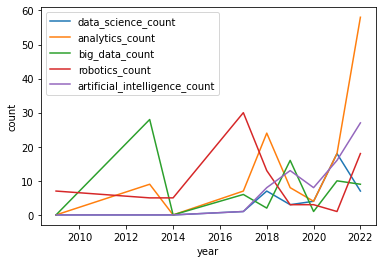

In [263]:
year_trend = database.iloc[:,:-1].groupby("year").sum()
plt.plot(year_trend)
plt.xlabel("year")
plt.ylabel("count")
plt.legend(year_trend.columns)
plt.savefig("trend.jpg",dpi=900)